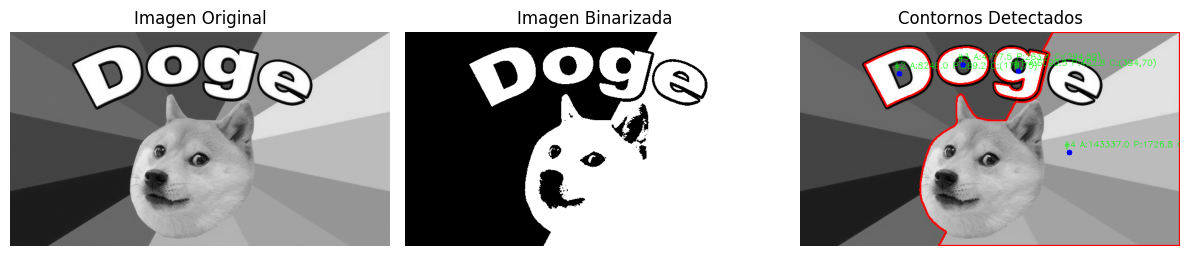

Se detectaron 4 contornos


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar una imagen y binarizarla
imagen = cv2.imread('doge.png', 0)  # Cargar en escala de grises
if imagen is None:
    # Si no existe el archivo, crear una imagen de ejemplo
    imagen = np.zeros((300, 300), dtype=np.uint8)
    # Dibujar algunas formas para el ejemplo
    cv2.rectangle(imagen, (50, 50), (150, 150), 255, -1)
    cv2.circle(imagen, (220, 220), 50, 255, -1)
    cv2.rectangle(imagen, (50, 200), (100, 250), 255, -1)

# Binarizar la imagen
_, imagen_bin = cv2.threshold(imagen, 127, 255, cv2.THRESH_BINARY)

# Detectar contornos
contornos, jerarquia = cv2.findContours(imagen_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Crear una copia de la imagen original para dibujar
imagen_color = cv2.cvtColor(imagen, cv2.COLOR_GRAY2BGR)

# Procesar cada contorno
for i, contorno in enumerate(contornos):
    # Calcular propiedades
    area = cv2.contourArea(contorno)
    perimetro = cv2.arcLength(contorno, True)
    
    # Calcular centroide
    M = cv2.moments(contorno)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
    else:
        cx, cy = 0, 0
    
    # Dibujar contorno
    color = (0, 0, 255)  # Rojo
    cv2.drawContours(imagen_color, [contorno], 0, color, 2)
    
    # Marcar centroide
    cv2.circle(imagen_color, (cx, cy), 5, (255, 0, 0), -1)
    
    # Etiquetar con métricas
    texto = f"#{i+1} A:{area:.1f} P:{perimetro:.1f} C:({cx},{cy})"
    cv2.putText(imagen_color, texto, (cx - 10, cy - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# Mostrar resultados
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(132)
plt.imshow(imagen_bin, cmap='gray')
plt.title('Imagen Binarizada')
plt.axis('off')

plt.subplot(133)
plt.imshow(cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB))
plt.title('Contornos Detectados')
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"Se detectaron {len(contornos)} contornos")
